In [1]:
import pandas as pd
import requests

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(api_url)
data = response.json()

df = pd.DataFrame(data)


In [2]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


None

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
print("Valores ausentes por columna:")
display(df.isnull().sum())

print("\nVerificación de duplicados (basado en customerID):")
display(df.duplicated(subset=['customerID']).sum())

Valores ausentes por columna:


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0



Verificación de duplicados (basado en customerID):


np.int64(0)

In [4]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Convert 'Churn' column to numerical
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert other binary columns to numerical
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'gender' column to numerical
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)


# Display the first few rows with the transformed columns
display(df.head())

# Display info to check data types
display(df.info())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

In [6]:
display(df.describe())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000


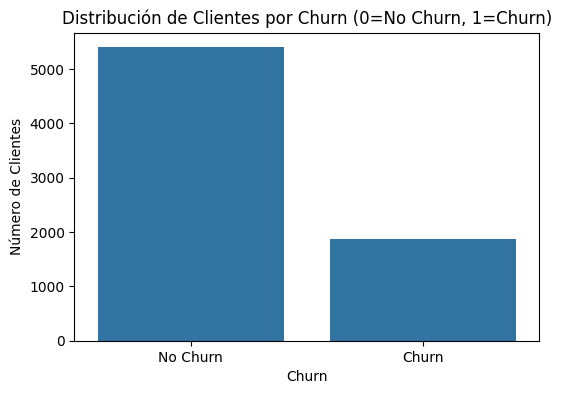

Conteo de clientes por Churn:


,count
Churn,
0,5398
1,1869


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Clientes por Churn (0=No Churn, 1=Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

print("Conteo de clientes por Churn:")
display(churn_counts)

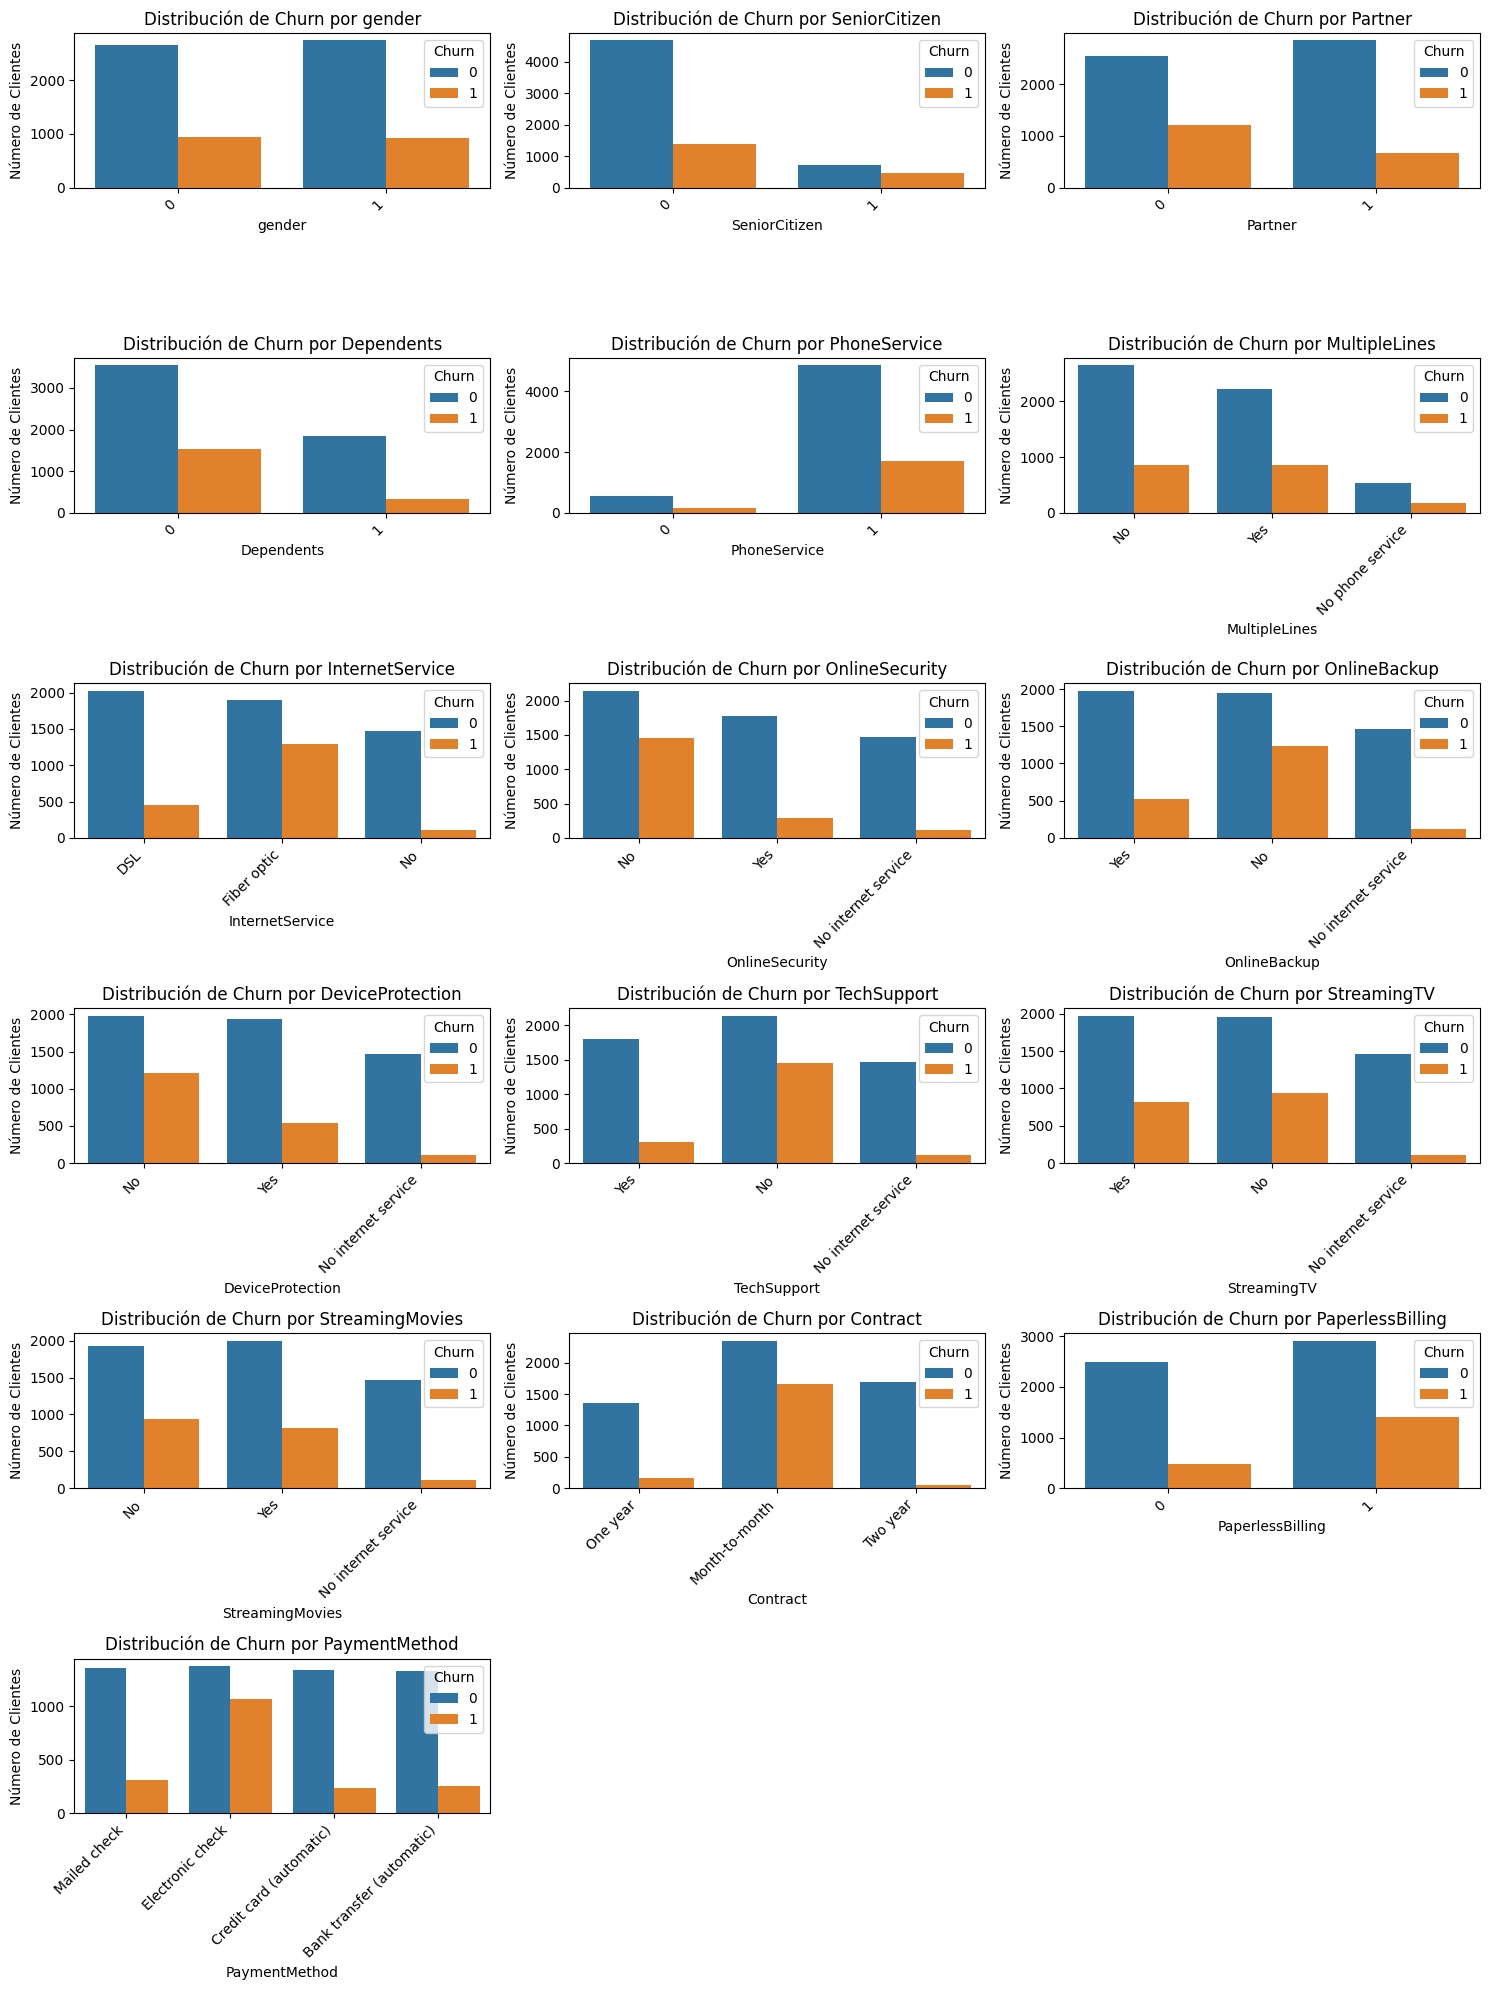

In [8]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols)//3 + 1, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

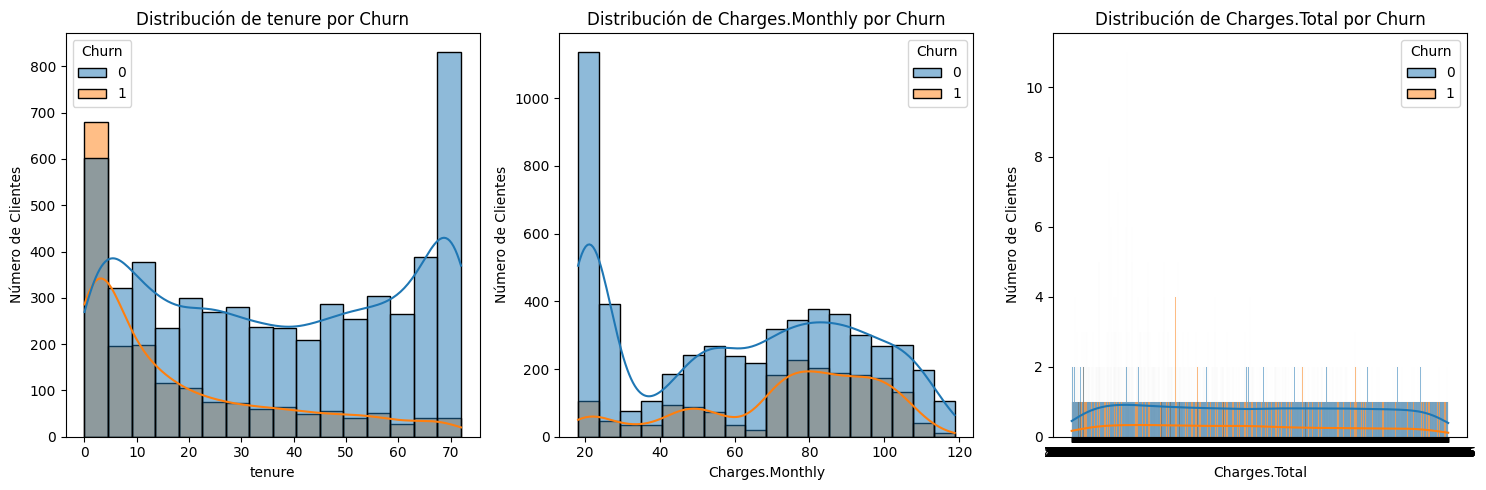

In [9]:
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

# Informe de Análisis de Evasión de Clientes (Churn)

## Introducción

El objetivo de este análisis es explorar y comprender los factores que influyen en la evasión de clientes (Churn) en el servicio de telecomunicaciones. La evasión de clientes es un problema crítico para las empresas, ya que retener a los clientes existentes es generalmente más rentable que adquirir nuevos. A través de este informe, presentaremos un análisis de los datos de clientes para identificar patrones y obtener insights que puedan ayudar a reducir la tasa de Churn.

## Limpieza y Tratamiento de Datos

Describa aquí los pasos realizados para importar, limpiar y procesar los datos. Mencione la fuente de los datos, cómo se manejaron los valores nulos y duplicados, y cualquier transformación realizada (por ejemplo, conversión de variables categóricas a numéricas).

*   **Importación de datos:** Los datos fueron cargados desde un archivo JSON disponible en un repositorio de GitHub.
*   **Normalización de datos anidados:** Las columnas con estructuras anidadas ('customer', 'phone', 'internet', 'account') fueron normalizadas para expandir sus contenidos en columnas separadas, facilitando el acceso a la información detallada.
*   **Verificación de valores ausentes y duplicados:** Se realizó una verificación inicial para identificar la presencia de valores ausentes y duplicados en el conjunto de datos. Afortunadamente, no se encontraron valores ausentes ni duplicados en la columna `customerID`.
*   **Transformación de variables:** Se convirtieron variables categóricas binarias ('Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender') a formato numérico (0 y 1) para facilitar el análisis cuantitativo.

In [16]:
print("Valores ausentes por columna después de la normalización:")
display(df.isnull().sum())

print("\nVerificación de duplicados (basado en customerID) después de la normalización:")
display(df.duplicated(subset=['customerID']).sum())

Valores ausentes por columna después de la normalización:


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0



Verificación de duplicados (basado en customerID) después de la normalización:


np.int64(0)

## Análisis Exploratorio de Datos

En esta sección, presentamos los resultados del análisis exploratorio de datos (AED). Se utilizaron visualizaciones para entender la distribución de la variable objetivo (Churn) y su relación con otras variables en el conjunto de datos.

### Distribución General de Churn

Se analizó la proporción de clientes que han evadido el servicio versus los que no.

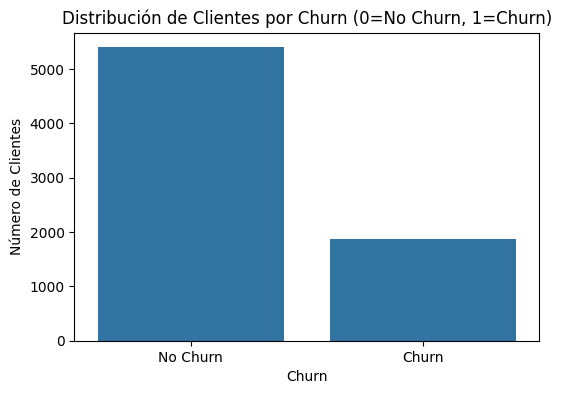

Conteo de clientes por Churn:


,count
Churn,
0,5398
1,1869


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Clientes por Churn (0=No Churn, 1=Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

print("Conteo de clientes por Churn:")
display(churn_counts)

### Distribución de Churn por Variables Categóricas

Se examinó la relación entre la evasión y diferentes variables categóricas para identificar si ciertas categorías están más asociadas con el Churn.

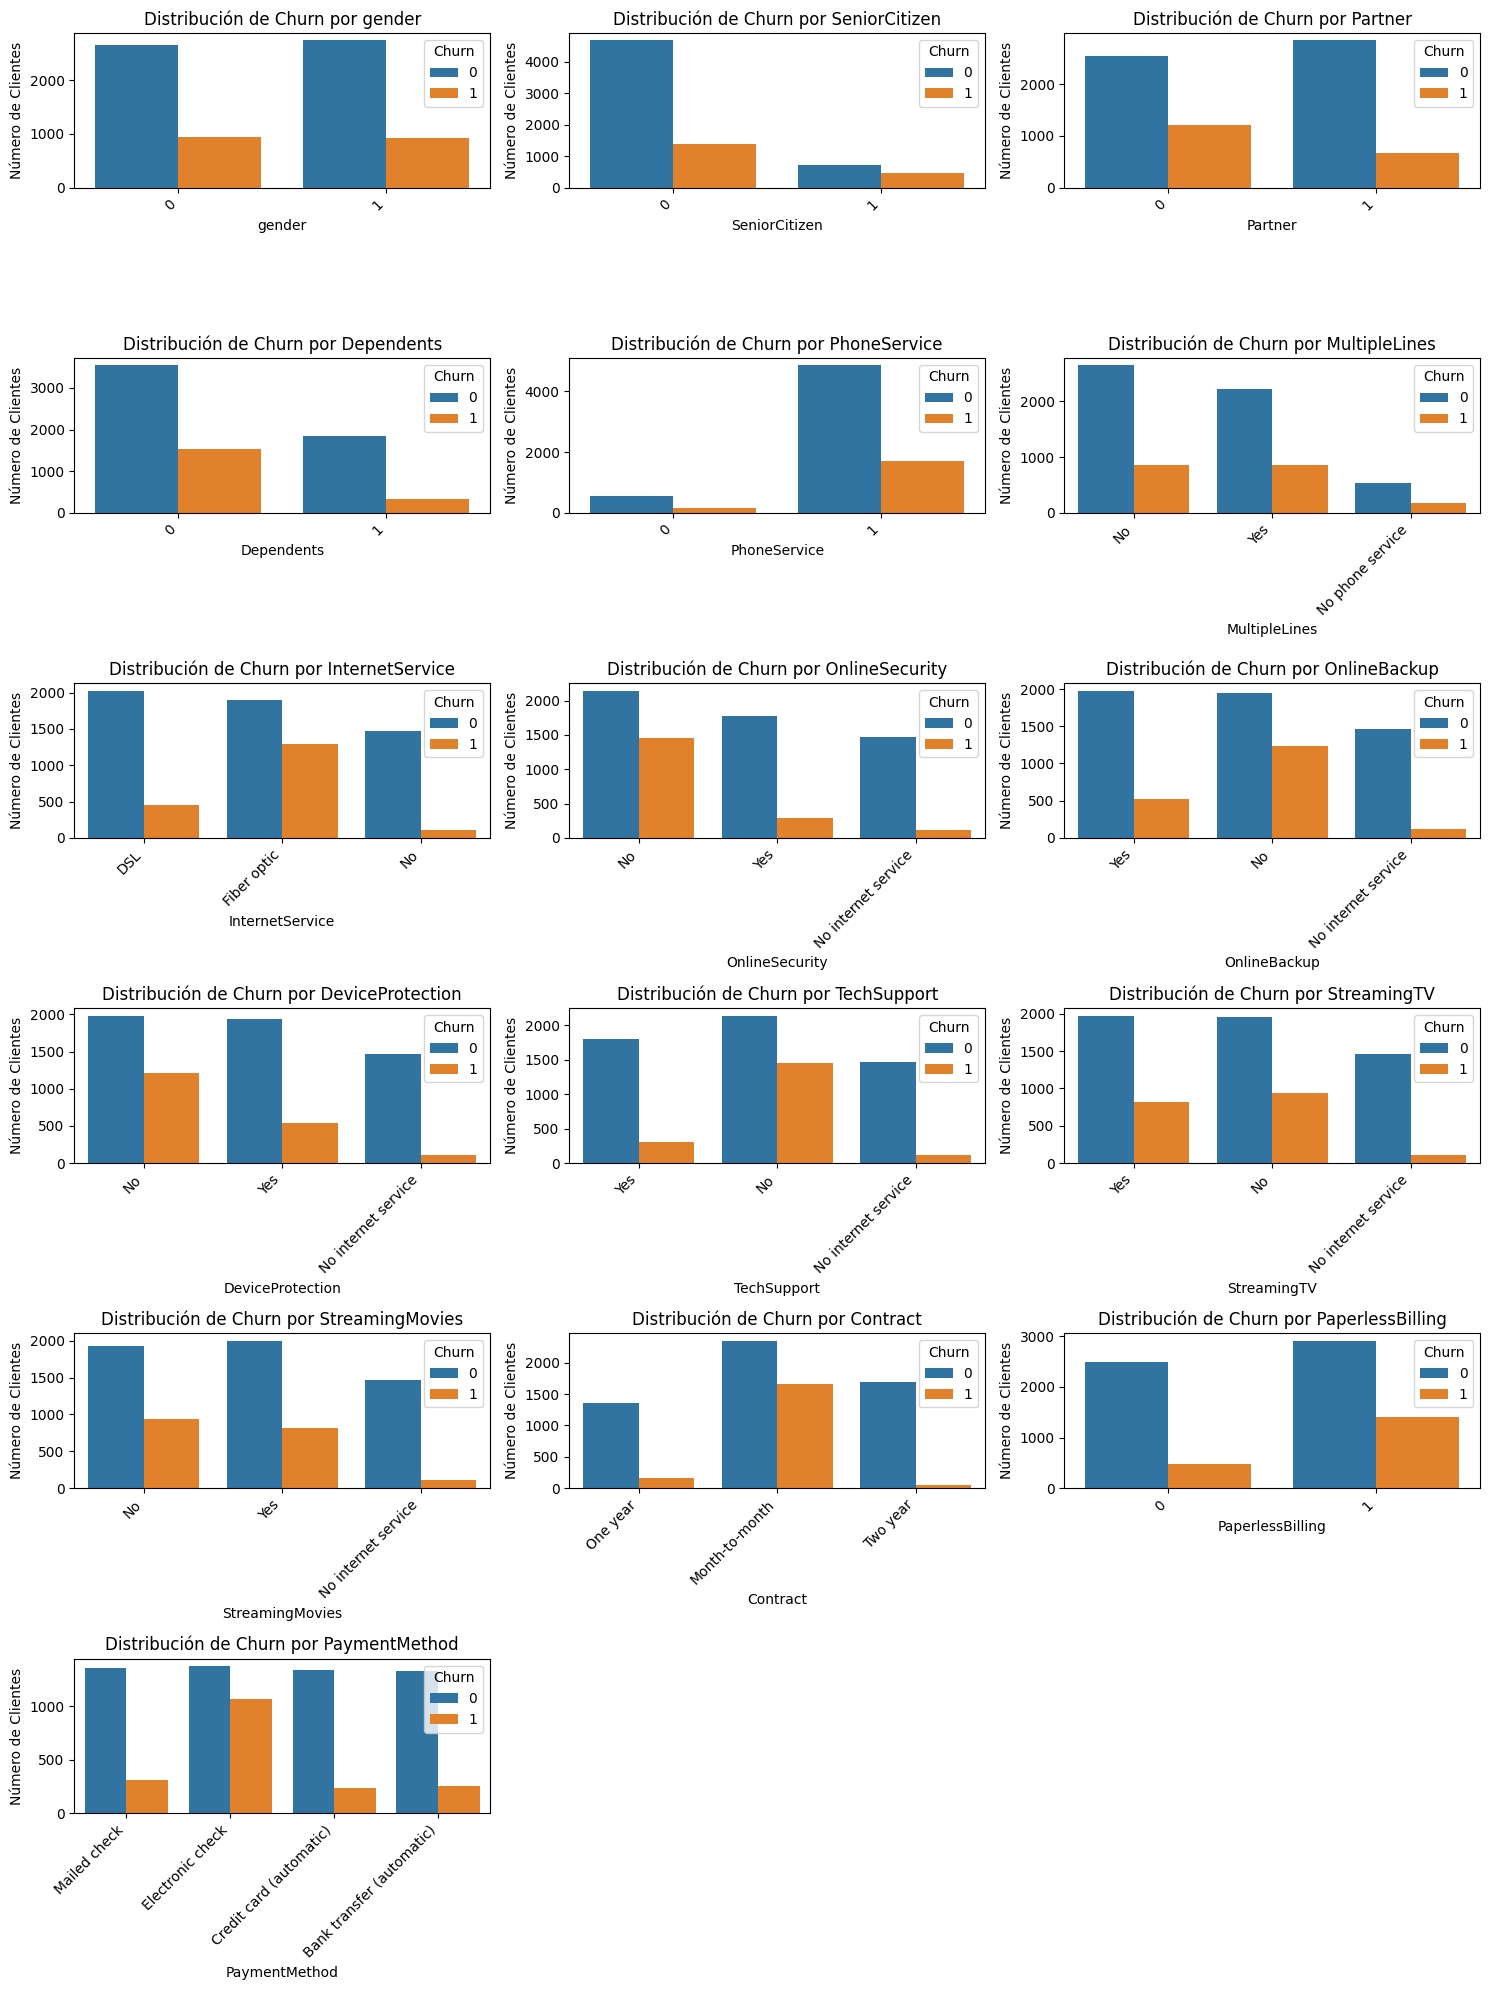

In [14]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols)//3 + 1, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribución de Churn por Variables Numéricas

Se analizó cómo las variables numéricas se distribuyen entre los clientes que evadieron y los que no.

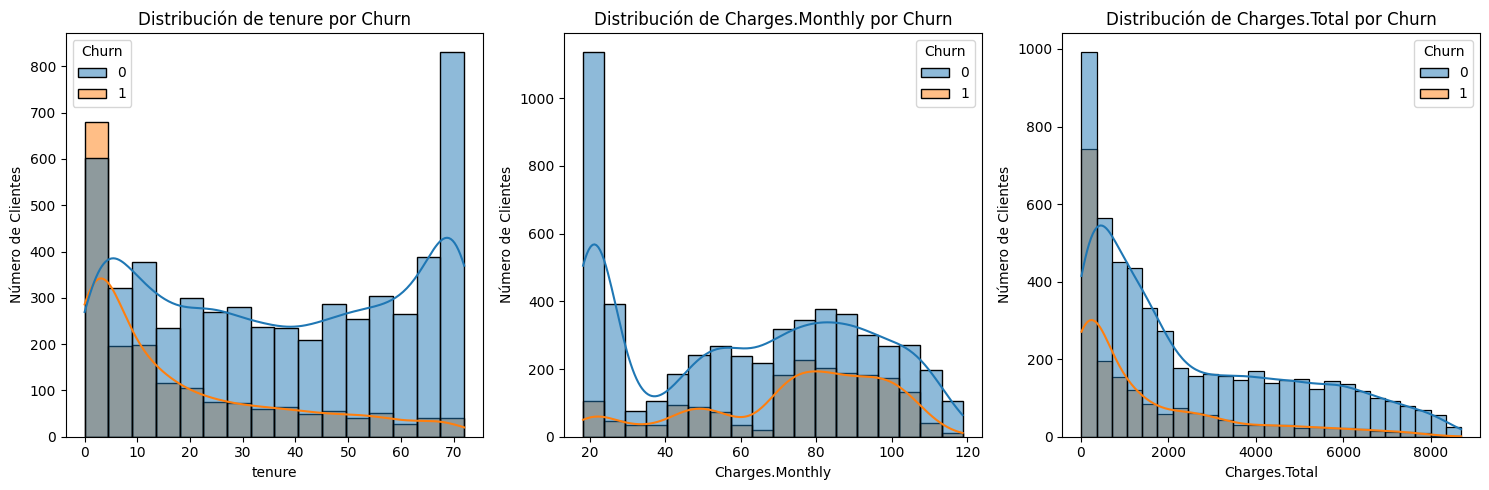

In [13]:
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

## Conclusiones e Insights

Basado en el análisis exploratorio de datos, aquí se resumen los principales hallazgos e insights sobre los factores que parecen estar más relacionados con la evasión de clientes.

*   **SeniorCitizen:** Los clientes de la tercera edad tienen una mayor tasa de Churn.
*   **Partner y Dependents:** Los clientes sin pareja o dependientes tienen una mayor tasa de Churn.
*   **PhoneService y MultipleLines:** No parece haber una diferencia significativa en la tasa de Churn basada en si tienen servicio telefónico o múltiples líneas.
*   **InternetService:** Los clientes con servicio de Internet de fibra óptica tienen una tasa de Churn notablemente más alta que aquellos con DSL o sin servicio de internet.
*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:** Los clientes que no tienen estos servicios adicionales tienen una mayor tasa de Churn. Esto sugiere que estos servicios pueden ser importantes para la retención.
*   **Contract:** Los clientes con contratos mes a mes tienen una tasa de Churn significativamente mayor en comparación con aquellos con contratos de uno o dos años.
*   **PaperlessBilling:** Los clientes con facturación electrónica tienen una tasa de Churn ligeramente más alta.
*   **PaymentMethod:** Los clientes que utilizan el pago electrónico ("Electronic check") tienen una tasa de Churn más alta.
*   **Tenure:** Los clientes con menor antigüedad ("tenure") tienen una mayor probabilidad de evadir.
*   **Charges.Monthly:** Los clientes con cargos mensuales más altos tienden a tener una mayor tasa de Churn.
*   **Charges.Total:** Los clientes con un total de cargos más bajo (lo cual está relacionado con menor antigüedad y/o menores cargos mensuales) tienen una mayor tasa de Churn.

## Recomendaciones

Con base en los insights obtenidos, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

*   **Programas de Retención para Clientes con Contratos Mes a Mes:** Dado que los clientes con contratos mes a mes tienen la tasa de Churn más alta, se deben implementar programas de retención específicos para este segmento, ofreciendo incentivos para cambiar a contratos de mayor duración.
*   **Promoción de Servicios Adicionales:** Fomentar la adopción de servicios como seguridad en línea, respaldo en línea, protección de dispositivos y soporte técnico, ya que los clientes que no tienen estos servicios tienden a evadir más.
*   **Atención Especial a Clientes con Fibra Óptica:** Investigar las razones detrás de la alta tasa de Churn en clientes con fibra óptica y abordar los posibles problemas de servicio o satisfacción.
*   **Programas de Fidelización para Clientes Nuevos:** Implementar estrategias para fidelizar a los clientes con menor antigüedad, ofreciendo beneficios o soporte adicional durante los primeros meses de servicio.
*   **Análisis Detallado de Métodos de Pago:** Investigar por qué el pago electrónico está asociado con una mayor tasa de Churn y considerar mejoras en la experiencia de pago o la comunicación con los clientes que utilizan este método.
*   **Segmentación y Ofertas Personalizadas:** Utilizar los insights del análisis para segmentar a los clientes en riesgo de evasión y ofrecerles promociones o paquetes personalizados que se ajusten a sus necesidades y preferencias.
*   **Mejorar la Experiencia del Cliente Senior:** Diseñar estrategias y servicios que se adapten mejor a las necesidades de los clientes de la tercera edad para mejorar su satisfacción y reducir la evasión en este segmento.

Este informe proporciona una base sólida para comprender la evasión de clientes. Los próximos pasos podrían incluir la construcción de un modelo predictivo de Churn para identificar individualmente a los clientes en riesgo y la implementación de las recomendaciones estratégicas propuestas.

Matriz de Correlación:


,Churn,tenure,Charges.Monthly,Charges.Total,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,gender
Churn,1.000000,-0.344079,0.189866,-0.194440,0.146733,-0.148546,-0.161384,0.012571,0.186666,-0.009555
tenure,-0.344079,1.000000,0.247982,0.825118,0.018187,0.377551,0.159892,0.010205,0.007949,0.005765
Charges.Monthly,0.189866,0.247982,1.000000,0.652109,0.220388,0.097122,-0.115832,0.246709,0.353714,-0.013889
Charges.Total,-0.194440,0.825118,0.652109,1.000000,0.103499,0.316918,0.063960,0.113791,0.159303,0.000488
SeniorCitizen,0.146733,0.018187,0.220388,0.103499,1.000000,0.022970,-0.212952,0.010060,0.157734,-0.004288
Partner,-0.148546,0.377551,0.097122,0.316918,0.022970,1.000000,0.448900,0.018828,-0.011201,-0.005007
Dependents,-0.161384,0.159892,-0.115832,0.063960,-0.212952,0.448900,1.000000,-0.003863,-0.111752,0.012038
PhoneService,0.012571,0.010205,0.246709,0.113791,0.010060,0.018828,-0.003863,1.000000,0.013624,-0.005073
PaperlessBilling,0.186666,0.007949,0.353714,0.159303,0.157734,-0.011201,-0.111752,0.013624,1.000000,-0.011273
gender,-0.009555,0.005765,-0.013889,0.000488,-0.004288,-0.005007,0.012038,-0.005073,-0.011273,1.000000


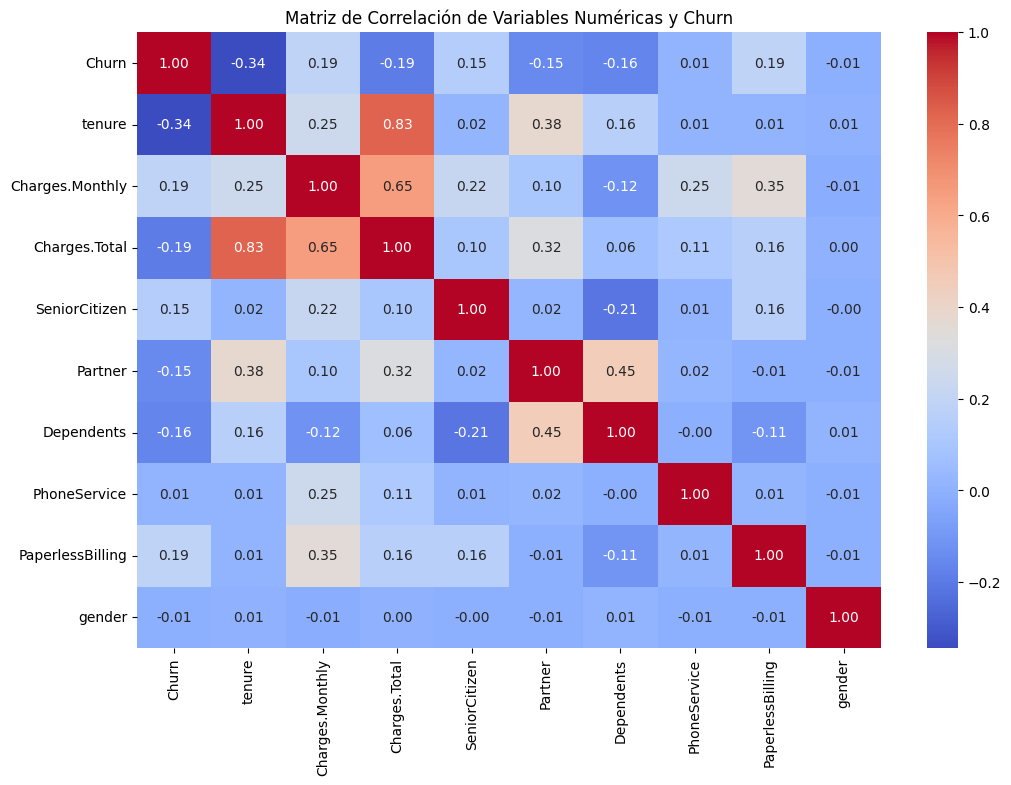

In [11]:
# Select numerical columns for correlation analysis
numerical_cols_for_corr = ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender']

# Convert 'Charges.Total' to numeric, coercing errors
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr()

# Display the correlation matrix
print("Matriz de Correlación:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas y Churn')
plt.show()

In [12]:
print("Análisis de la Matriz de Correlación:")
print("Observaciones clave:")
print("- 'tenure' (antigüedad) tiene una correlación negativa moderada con 'Churn' (-0.34), lo que indica que los clientes con mayor antigüedad son menos propensos a la evasión.")
print("- 'Charges.Monthly' (cargos mensuales) tiene una correlación positiva débil con 'Churn' (0.19), sugiriendo que cargos mensuales más altos podrían estar ligeramente asociados con una mayor evasión.")
print("- 'Charges.Total' (cargos totales) tiene una correlación negativa débil con 'Churn' (-0.19), lo cual es coherente con la relación de 'tenure' y 'Charges.Monthly'.")
print("- 'SeniorCitizen' tiene una correlación positiva débil con 'Churn' (0.15), indicando que los clientes de la tercera edad tienen una ligera mayor propensión a la evasión.")
print("- 'Partner' y 'Dependents' tienen correlaciones negativas débiles con 'Churn' (-0.15 y -0.16 respectivamente), lo que sugiere que tener pareja o dependientes puede estar asociado con una menor evasión.")
print("- 'PaperlessBilling' tiene una correlación positiva débil con 'Churn' (0.19), lo que podría indicar que los clientes con facturación electrónica tienen una ligera mayor tendencia a la evasión.")
print("\nEn general, las correlaciones con 'Churn' no son muy fuertes, lo que sugiere que la evasión es un fenómeno complejo influenciado por múltiples factores.")

Análisis de la Matriz de Correlación:
Observaciones clave:
- 'tenure' (antigüedad) tiene una correlación negativa moderada con 'Churn' (-0.34), lo que indica que los clientes con mayor antigüedad son menos propensos a la evasión.
- 'Charges.Monthly' (cargos mensuales) tiene una correlación positiva débil con 'Churn' (0.19), sugiriendo que cargos mensuales más altos podrían estar ligeramente asociados con una mayor evasión.
- 'Charges.Total' (cargos totales) tiene una correlación negativa débil con 'Churn' (-0.19), lo cual es coherente con la relación de 'tenure' y 'Charges.Monthly'.
- 'SeniorCitizen' tiene una correlación positiva débil con 'Churn' (0.15), indicando que los clientes de la tercera edad tienen una ligera mayor propensión a la evasión.
- 'Partner' y 'Dependents' tienen correlaciones negativas débiles con 'Churn' (-0.15 y -0.16 respectivamente), lo que sugiere que tener pareja o dependientes puede estar asociado con una menor evasión.
- 'PaperlessBilling' tiene una correla